## 0. Install and Import Dependencies

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install easyocr
!pip install imutils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 14.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manyli

In [3]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

## 1. Read in Image, Grayscale and Blur

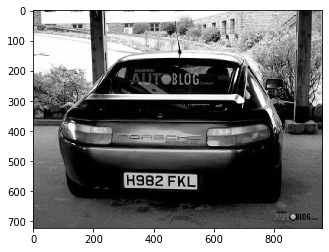

In [ ]:
img = cv2.imread('image4.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

## 2. Apply filter and find edges for localization

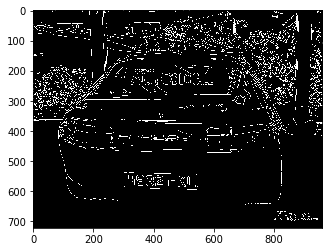

In [ ]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

## 3. Find Contours and Apply Mask

In [ ]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [ ]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [ ]:
location

array([[[300, 540]],

       [[306, 589]],

       [[543, 592]],

       [[538, 543]]], dtype=int32)

In [ ]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

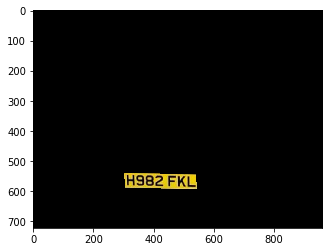

In [ ]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [ ]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

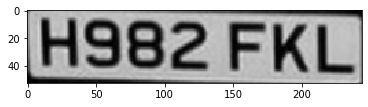

In [ ]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

## 4. Use Easy OCR To Read Text

In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

[([[0, 0], [244, 0], [244, 53], [0, 53]], 'H982FKL', 0.6736311316490173)]

## 5. Render Result

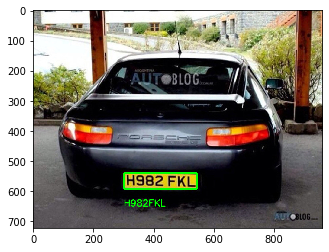

In [ ]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

In [4]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.3/800.3 kB 5.8 MB/s eta 0:00:00


In [6]:
!pip install opencv-python==4.8.0.74

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 25.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.8.0.76
    Uninstalling opencv-python-4.8.0.76:
      Successfully uninstalled opencv-python-4.8.0.76


In [5]:
# TensorFlow
# !pip install python-doctr[tf]
# PyTorch
!pip install python-doctr[torch]
# Restart runtime
!pip install ultralytics
# Colab related installations to install pyproject.toml projects correctly
!sudo apt install libcairo2-dev pkg-config
!pip3 install pycairo
# Install the most up-to-date version from GitHub
# TensorFlow
# !pip install python-doctr[tf]@git+https://github.com/mindee/doctr.git
# PyTorch
!pip3 install python-doctr[torch]@git+https://github.com/mindee/doctr.git
# Install some free fonts for result rendering
!sudo apt-get install fonts-freefont-ttf -y
!pip install inference-sdk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 57.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 64.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.3/289.3 kB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 12.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 74.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 89.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 84.3 MB/s eta 0:00:00
     ━━━━━━━━━━

In [7]:
import cv2
from ultralytics import YOLO
%matplotlib inline
import os

# Let's pick the desired backend
# os.environ['USE_TF'] = '1'
os.environ['USE_TORCH'] = '1'

import matplotlib.pyplot as plt

from doctr.io import DocumentFile
from doctr.models import ocr_predictor
import os
from inference_sdk import InferenceHTTPClient


0: 384x640 (no detections), 7.8ms
Speed: 2.3ms preprocess, 7.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 8.0ms
Speed: 2.6ms preprocess, 8.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 10.7ms
Speed: 3.5ms preprocess, 10.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 8.5ms
Speed: 2.6ms preprocess, 8.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 9.1ms
Speed: 2.7ms preprocess, 9.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 10.8ms
Speed: 3.0ms preprocess, 10.8ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 8.2ms
Speed: 2.7ms preprocess, 8.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 license_plate, 7.6ms
Speed: 2.6ms preprocess, 7.6ms inference, 1.

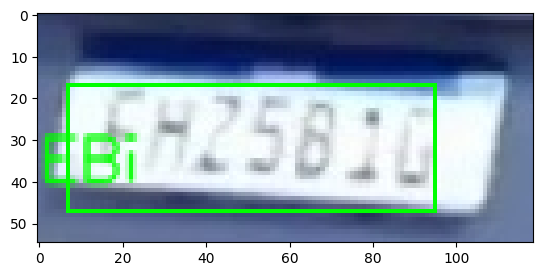


0: 384x640 1 license_plate, 8.2ms
Speed: 3.4ms preprocess, 8.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


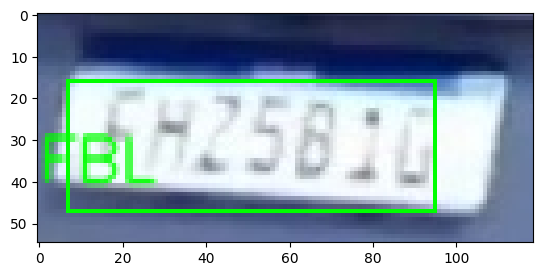


0: 384x640 1 license_plate, 8.9ms
Speed: 2.5ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


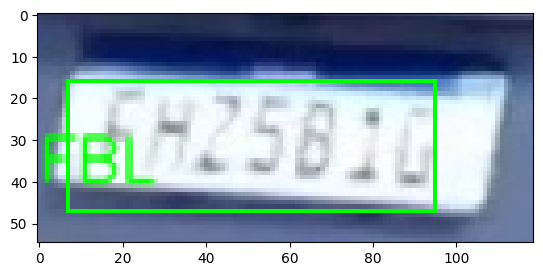


0: 384x640 1 license_plate, 8.3ms
Speed: 3.1ms preprocess, 8.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
Nenhum contorno quadrilateral encontrado.

0: 384x640 1 license_plate, 8.8ms
Speed: 3.4ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


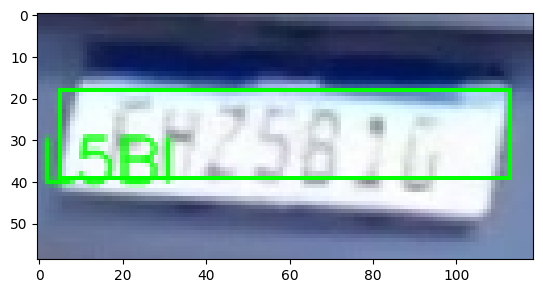


0: 384x640 1 license_plate, 8.5ms
Speed: 3.5ms preprocess, 8.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
Nenhum contorno quadrilateral encontrado.

0: 384x640 1 license_plate, 7.9ms
Speed: 3.1ms preprocess, 7.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)
Nenhum contorno quadrilateral encontrado.

0: 384x640 1 license_plate, 8.1ms
Speed: 2.5ms preprocess, 8.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)
Nenhum contorno quadrilateral encontrado.

0: 384x640 1 license_plate, 11.0ms
Speed: 3.4ms preprocess, 11.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)
Nenhum contorno quadrilateral encontrado.

0: 384x640 1 license_plate, 8.3ms
Speed: 3.5ms preprocess, 8.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)
Nenhum contorno quadrilateral encontrado.

0: 384x640 1 license_plate, 8.1ms
Speed: 3.3ms preprocess, 8.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)
Ne

KeyboardInterrupt: 

In [15]:
from ultralytics import YOLO
import cv2
import numpy as np
import imutils
import easyocr
import matplotlib.pyplot as plt

# Abre o vídeo
video_path = '/content/drive/MyDrive/testplaca.mp4'
cap = cv2.VideoCapture(video_path)
# Instantiate a pretrained model
model = YOLO('/content/license_plate_detector.pt')
frame_count = 0
plate_count = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Realiza a detecção na frame atual
    results = model(frame)

    # Verifica se há alguma detecção
    if results[0].boxes:
        # Itera sobre as detecções
        for result in results[0].boxes:  # xyxy form is [x1, y1, x2, y2, confidence, class]
            x1, y1, x2, y2 = map(int, result.xyxy[0])  # Converte para inteiros
            confidence = result.conf[0]
            cls = result.cls[0]

            # Recorta o carro detectado
            plate_img = frame[y1:y2, x1:x2]

            # Salva a imagem recortada
            img_path = f'plates/plate_{plate_count}.jpg'
            cv2.imwrite(img_path, plate_img)

            # Lê a imagem e converte para escala de cinza
            img = cv2.imread(img_path)
            if img is None:
                print(f"Erro ao carregar a imagem: {img_path}")
                continue

            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Aplica filtro de borda e ruído
            bfilter = cv2.bilateralFilter(gray, 11, 17, 17) # Noise reduction
            edged = cv2.Canny(bfilter, 30, 200) # Edge detection

            # Encontrando contornos
            keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
            contours = imutils.grab_contours(keypoints)
            contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

            location = None
            for contour in contours:
                approx = cv2.approxPolyDP(contour, 10, True)
                if len(approx) == 4:
                    location = approx
                    break

            if location is None:
                print("Nenhum contorno quadrilateral encontrado.")
                continue

            mask = np.zeros(gray.shape, np.uint8)
            new_image = cv2.drawContours(mask, [location], 0, 255, -1)
            new_image = cv2.bitwise_and(img, img, mask=mask)

            (x, y) = np.where(mask == 255)
            (x1, y1) = (np.min(x), np.min(y))
            (x2, y2) = (np.max(x), np.max(y))
            cropped_image = gray[x1:x2+1, y1:y2+1]
            reader = easyocr.Reader(['en'])
            result = reader.readtext(cropped_image)

            if len(result) == 0:
                print("Nenhum texto encontrado.")
                continue

            text = result[0][-2]
            font = cv2.FONT_HERSHEY_SIMPLEX
            res = cv2.putText(img, text=text, org=(0, 40), fontFace=font, fontScale=0.5, color=(0,255,0), thickness=1, lineType=cv2.LINE_AA)
            res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0), 1)
            plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
            plt.show()

            plate_count += 1

    frame_count += 1

cap.release()
cv2.destroyAllWindows()
